#Imports

In [1]:
import numpy as np
from scipy.io import loadmat 

In [2]:
from matplotlib import pyplot as plt

In [3]:
!wget 'http://bbci.de/competition/download/competition_iv/BCICIV_1_mat.zip'

--2023-01-01 18:30:05--  http://bbci.de/competition/download/competition_iv/BCICIV_1_mat.zip
Resolving bbci.de (bbci.de)... 130.149.80.149
Connecting to bbci.de (bbci.de)|130.149.80.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://bbci.de/competition/download/competition_iv/BCICIV_1_mat.zip [following]
--2023-01-01 18:30:05--  https://bbci.de/competition/download/competition_iv/BCICIV_1_mat.zip
Connecting to bbci.de (bbci.de)|130.149.80.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252211988 (241M) [application/zip]
Saving to: ‘BCICIV_1_mat.zip’

BCICIV_1_mat.zip    100%[===================>] 240.53M  29.1MB/s    in 9.0s    

2023-01-01 18:30:14 (26.8 MB/s) - ‘BCICIV_1_mat.zip’ saved [252211988/252211988]



In [4]:
!unzip '/content/BCICIV_1_mat.zip'

Archive:  /content/BCICIV_1_mat.zip
  inflating: BCICIV_calib_ds1a.mat   
  inflating: BCICIV_calib_ds1b.mat   
  inflating: BCICIV_calib_ds1c.mat   
  inflating: BCICIV_calib_ds1d.mat   
  inflating: BCICIV_calib_ds1e.mat   
  inflating: BCICIV_calib_ds1f.mat   
  inflating: BCICIV_calib_ds1g.mat   
  inflating: BCICIV_eval_ds1a.mat    
  inflating: BCICIV_eval_ds1b.mat    
  inflating: BCICIV_eval_ds1c.mat    
  inflating: BCICIV_eval_ds1d.mat    
  inflating: BCICIV_eval_ds1e.mat    
  inflating: BCICIV_eval_ds1f.mat    
  inflating: BCICIV_eval_ds1g.mat    


#Exploring the dataset

In [5]:
data_1 = loadmat('BCICIV_calib_ds1g.mat', struct_as_record=True)

In [6]:
print(type(data_1), data_1.keys())

<class 'dict'> dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])


In [7]:
trans_data = np.transpose(data_1['cnt'])
trans_data.shape

(59, 190602)

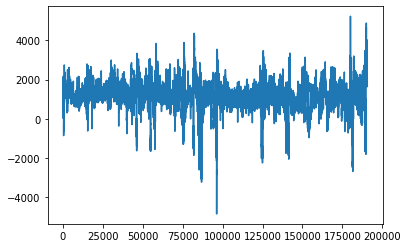

In [8]:
plt.plot(data_1['cnt'][:,0]);
plt.show()

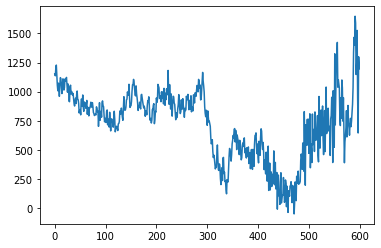

In [9]:
plt.plot(trans_data[1][2256:2856]);

In [10]:
print(data_1['mrk']['y'][0][0][0], data_1['nfo']['fs'][0], data_1['nfo']['classes'][0][0][0][0][0])

[ 1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1
 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1
 -1  1  1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1
  1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1
 -1 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1
  1 -1 -1 -1 -1 -1  1  1] [array([[100]], dtype=uint8)] left


In [11]:
sfreq = data_1['nfo']['fs'][0][0][0][0]
EEGdata   = data_1['cnt'].T
nchannels, nsamples = EEGdata.shape

chan_names = [s[0] for s in data_1['nfo']['clab'][0][0][0]]

event_onsets  = data_1['mrk'][0][0][0]
event_codes   = data_1['mrk'][0][0][1]

labels = np.zeros((1, nsamples), int)
labels[0, event_onsets] = event_codes

cl_lab = [s[0] for s in data_1['nfo']['classes'][0][0][0]]
cl1    = cl_lab[0]
cl2    = cl_lab[1]

# digitized electrode positions 
xpos = data_1['nfo']['xpos']
ypos = data_1['nfo']['ypos']

nclasses = len(cl_lab)
nevents = len(event_onsets)

# Print some information
print('Shape of EEG:', EEGdata.shape)
print('Sample rate:', sfreq)
print('Number of channels:', nchannels)
print('Channel names:', chan_names)
print('Number of events:', len(event_onsets))
print('Event codes:', np.unique(event_codes))
print('Class labels:', cl_lab)
print('Number of classes:', nclasses)

Shape of EEG: (59, 190602)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2


#Defining a function transfers the **signals** to **spectrums**

In [12]:
def discrete_fourier_transform(complex_signal, freq):
    X = np.zeros(freq,complex)
    index_value = np.arange(0,complex_signal.shape[0],1)
    index_value = index_value / index_value.shape[0]
    for k in range(freq):
        #sum = 0
        #for n in range(complex_signal.shape[0]):
            #sum += complex_signal[n] * np.exp((-2j * np.pi * k+1 * n) / complex_signal.shape[0])
          #temp = complex_signal.copy()
          #index_value = np.arange(0,complex_signal.shape[0],1)
          #s = np.exp(index_value*-2j * np.pi * Xk[k].real / temp.shape[0])
          #Xk[k] = np.dot(temp,s)
          complex_sine_wave = np.exp(-2*np.pi*1j*k*index_value)
          X[k] = np.dot(complex_sine_wave,complex_signal.copy())
          #X[k] = np.sum(complex_signal.copy()*np.exp(-2j*np.pi*k*index_value/complex_signal.shape[0]))
    return X

#Segment the dataset into trials

In [13]:
# Dictionary to store the trials in, each class gets an entry
trials = {}

# The time window to extract for each trial, here 0 -- 8 seconds
win = np.arange(int(0*sfreq), int(8*sfreq))

# Length of the time window
nsamples = len(win)

# Loop over the classes (right, foot)
for cl, code in zip(cl_lab, np.unique(event_codes)):
    
    # Extract the onsets for the class
    cl_onsets = event_onsets[event_codes == code]
    print("onset: ", len(cl_onsets))
    print("================================")
    # Allocate memory for the trials
    trials[cl] = np.zeros((nchannels,  len(cl_onsets),nsamples))
    
    # Extract each trial
    for i, onset in enumerate(cl_onsets):
        trials[cl][:,i,:] = EEGdata[:, win+onset]
        
# the dimensionality of the data (channels x time x trials)
print('Shape of trials[cl1]:', trials[cl1].shape)
print('Shape of trials[cl2]:', trials[cl2].shape)

onset:  100
onset:  100
Shape of trials[cl1]: (59, 100, 600)
Shape of trials[cl2]: (59, 100, 600)


In [14]:
class_1 = trials[cl1]
class_2 = trials[cl2]
print(class_1.shape, class_2.shape)

(59, 100, 600) (59, 100, 600)


#Baseline correction

In [15]:
avg_1 = class_1[:,:,:200].mean(axis=2)
avg_2 = class_2[:,:,:200].mean(axis=2)
avg_1 = avg_1.reshape(avg_1.shape[0],avg_1.shape[1],1)
avg_2 = avg_2.reshape(avg_2.shape[0],avg_2.shape[1],1)
class_1 -= avg_1
class_2 -= avg_1

In [16]:
class_1 = class_1[:,:,200:]
class_2 = class_2[:,:,200:]

#ERP analysis

In [17]:
signal_1 = class_1.copy().mean(axis=1) #Right hand class
signal_2 = class_2.copy().mean(axis=1) #Left hand class

In [18]:
freq_1 = np.zeros(shape=(5,signal_1.shape[1]))
freq_2 = np.zeros(shape=(5,signal_2.shape[1]))

In [19]:
for i in range(freq_1.shape[0]):
    DFT1 = discrete_fourier_transform(signal_1[i], freq_1.shape[1])
    DFT2 = discrete_fourier_transform(signal_2[i], freq_2.shape[1])

    DFT1 /= 2
    DFT2 /= 2

    DFT1 = np.abs(DFT1)
    DFT2 = np.abs(DFT2)

    DFT1 = np.sqrt(np.power(DFT1.real,2)+np.power(DFT1.imag,2)) 
    DFT1 /= (freq_1.shape[1])/2

    DFT2 = np.sqrt(np.power(DFT2.real,2)+np.power(DFT2.imag,2)) 
    DFT2 /= (freq_2.shape[1])/2

    freq_1[i] = DFT1
    freq_2[i] = DFT2

In [20]:
freq_1 = freq_1[:,:50]
freq_2 = freq_2[:,:50]

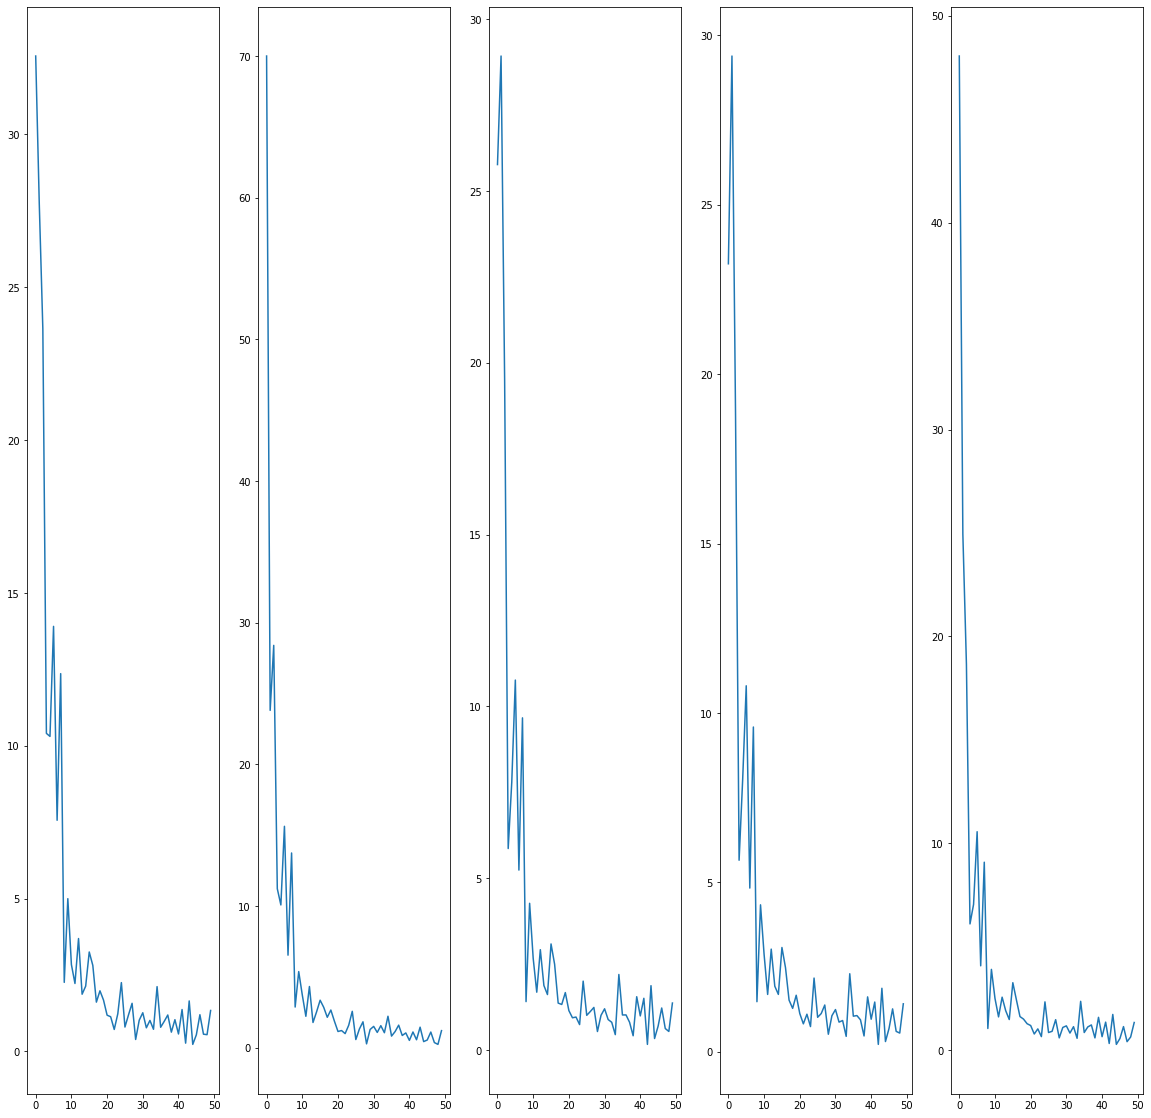

In [23]:
plt.figure(figsize=(20, 20))
for i in range(0,5):
    ax = plt.subplot(1, 5, i+1);
    plt.plot(freq_1[i]);
plt.show();

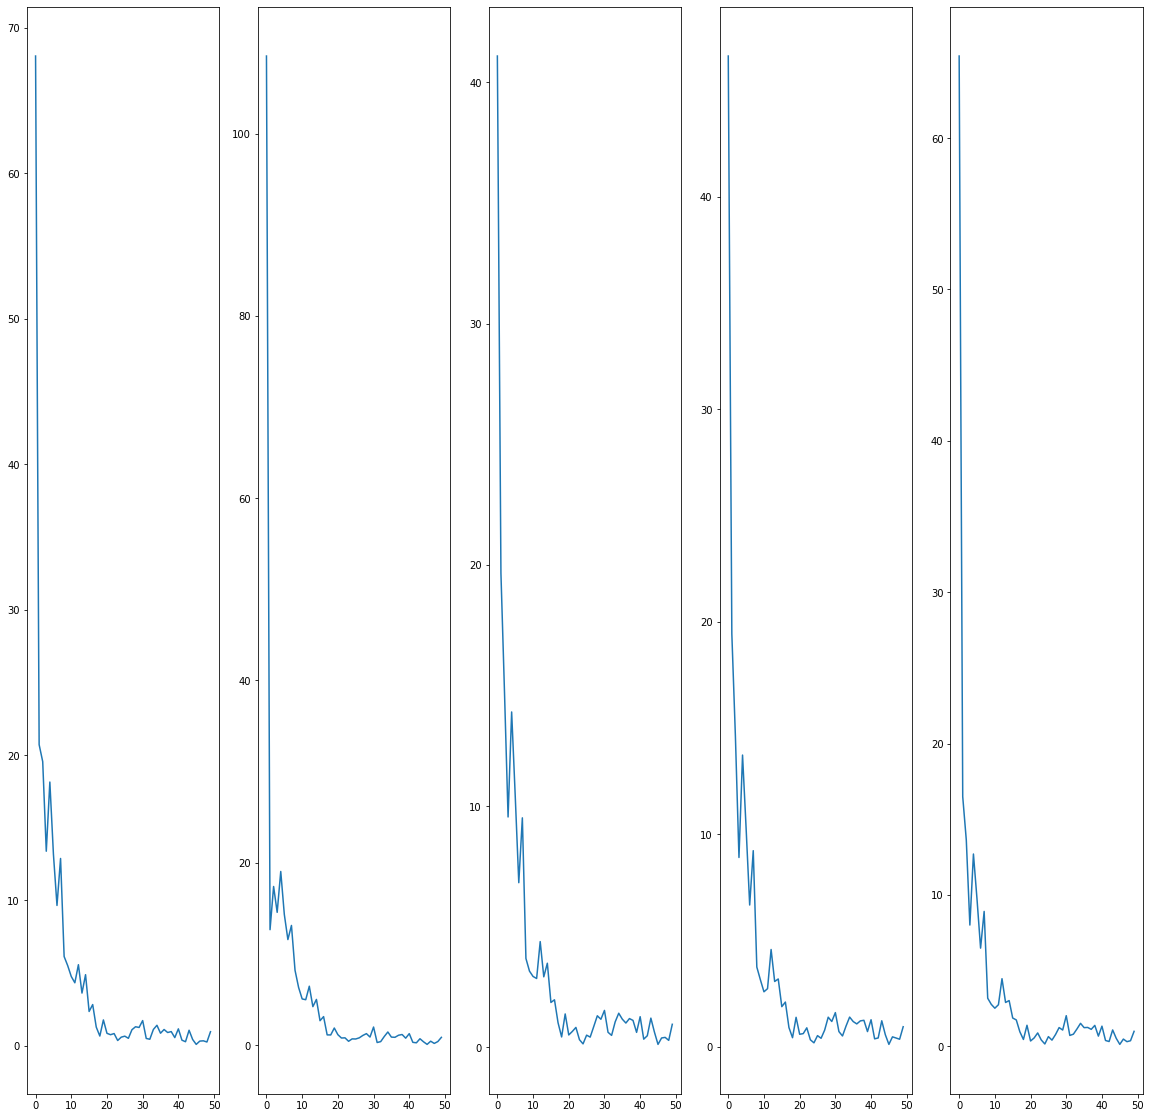

In [24]:
plt.figure(figsize=(20, 20))
for i in range(0,5):
    ax = plt.subplot(1, 5, i+1);
    plt.plot(freq_2[i]);
plt.show();

##As we see above, Signals comes from **Right hand** motor imaginary has Powers less than that of signals comes from **Left hand** motor imaginary

In [25]:
fourier_1 = np.zeros(shape=class_1.shape)
fourier_2 = np.zeros(shape=class_2.shape)

#Converting The data from Time-domain to Frequency domain

In [26]:
for j in range (fourier_1.shape[0]):
    for i in range(fourier_1.shape[1]):
        spectrum_1 = discrete_fourier_transform(class_1[j,i], fourier_1.shape[2])
        spectrum_2 = discrete_fourier_transform(class_2[j,i], fourier_2.shape[2])

        spectrum_1 = spectrum_1 / 2
        spectrum_1 = np.abs(spectrum_1)

        spectrum_2 = spectrum_2 / 2
        spectrum_2 = np.abs(spectrum_2)

        spectrum_1 = np.sqrt(np.power(spectrum_1.real,2)+np.power(spectrum_1.imag,2)) 
        spectrum_1 /= (fourier_1.shape[2])/2

        spectrum_2 = np.sqrt(np.power(spectrum_2.real,2)+np.power(spectrum_2.imag,2)) 
        spectrum_2 /= (fourier_2.shape[2])/2

        fourier_1[j,i] = spectrum_1
        fourier_2[j,i] = spectrum_2

In [27]:
fourier_1 = fourier_1[:,:,:50]
fourier_2 = fourier_2[:,:,:50]

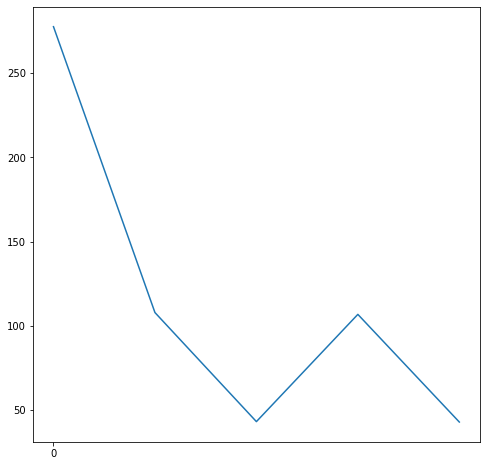

In [28]:
plt.figure(figsize=(8,8))
plt.xticks(np.arange(0,100, 5))
plt.plot(fourier_1[9][0][0:5]);

In [29]:
T1 = fourier_1.copy()
T2 = fourier_2.copy()

In [30]:
T1 = np.reshape(T1,(5900,-1))
T2 = np.reshape(T2,(5900,-1))

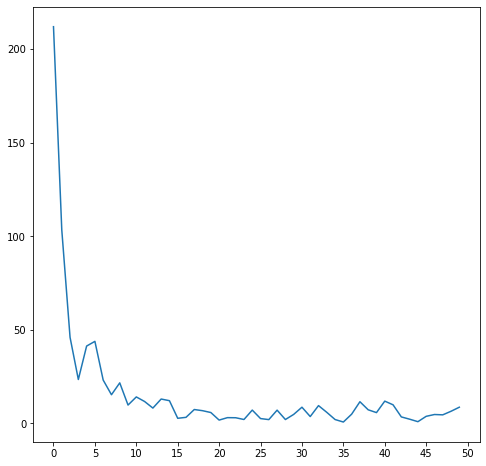

In [31]:
plt.figure(figsize=(8,8))
plt.xticks(np.arange(0,100, 5))
plt.plot(T2[0]);

In [32]:
data = np.concatenate([T2, T1]) 
# fourier_1 ===> right
# fourier_2 ===> left

In [33]:
data.shape

(11800, 50)

#Band Pass Filtering

In [34]:
data = data[:,10:30]

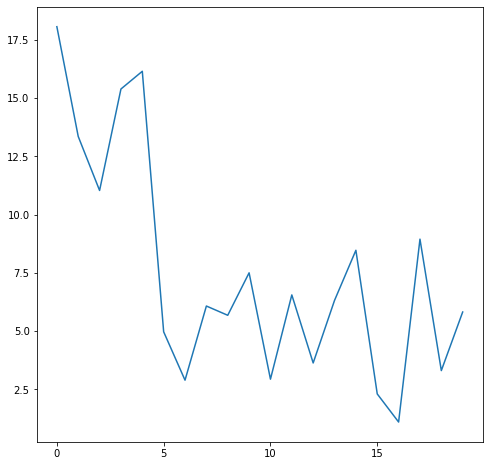

In [35]:
plt.figure(figsize=(8,8))
plt.xticks(np.arange(0,100, 5))
plt.plot(data[1000]);

In [36]:
target = np.concatenate([np.zeros(T2.shape[0]), np.ones(T1.shape[0])])
target

array([0., 0., 0., ..., 1., 1., 1.])

In [37]:
target = np.reshape(target, (target.shape[0],1))

In [38]:
data = np.concatenate([data, target], axis = 1)
np.random.shuffle(data)
data.shape

(11800, 21)

In [39]:
target = data[:,-1]
print(target.shape)
target

(11800,)


array([1., 1., 0., ..., 0., 0., 0.])

In [40]:
target = np.reshape(target, (target.shape[0],1))
data = data[:,:-1]
data.shape

(11800, 20)

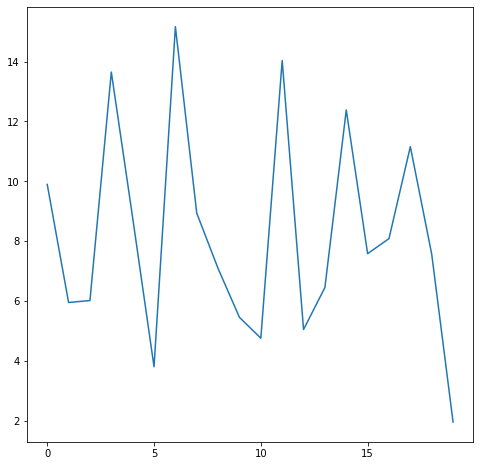

In [41]:
plt.figure(figsize=(8,8))
plt.xticks(np.arange(0,100, 5))
plt.plot(data[1]);

#Training

In [42]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [43]:
stop = EarlyStopping(monitor='loss', patience=3)

In [44]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(data.shape[1]), name="input"),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [46]:
from sklearn.model_selection import KFold

n_split=5

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=target[train_index],target[test_index]
  model.fit(x_train, y_train,epochs=20, callbacks=[stop])
  
  print('Model evaluation ',model.evaluate(x_test,y_test))

Epoch 1/20
295/295 [==============================] - 1s 2ms/step - loss: 0.2765 - accuracy: 0.5901
Epoch 2/20
295/295 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.6604
Epoch 3/20
295/295 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.7079
Epoch 4/20
295/295 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.7316
Epoch 5/20
295/295 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.7492
Epoch 6/20
295/295 [==============================] - 1s 2ms/step - loss: 0.1590 - accuracy: 0.7655
Epoch 7/20
295/295 [==============================] - 1s 2ms/step - loss: 0.1523 - accuracy: 0.7765
Epoch 8/20
295/295 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.7862
Epoch 9/20
295/295 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.8059
Epoch 10/20
295/295 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.8100

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest_scores = cross_val_score(forest, data, target.ravel(), cv=5)
forest_scores

array([0.93940678, 0.94110169, 0.94576271, 0.94194915, 0.94279661])